# Деревья решений и ансамблевые методы в Scikit-Learn

В этом ноутбуке рассмотрены деревья решений и ансамблевые методы, такие как случайный лес и бустинг. Эти методы широко используются в задачах классификации и регрессии.

## 1. Деревья решений

Деревья решений — это популярный алгоритм машинного обучения, используемый для задач классификации и регрессии. Он работает по принципу разбиения данных на основе определённых признаков для предсказания целевого значения. Этот алгоритм может быть визуализирован в виде дерева, где каждый узел представляет собой признак, ветви — возможные значения этого признака, а листья — предсказания или классы.

Основные понятия:
- **Корень дерева** — начальная точка, от которой начинается разбиение данных.
- **Узлы** — точки, где происходит проверка признака или принятие решения.
- **Ветви** — пути, ведущие к следующему узлу или листу.
- **Листья** — узлы, которые представляют собой конечное решение или предсказание.

Алгоритм построения дерева решений основывается на выборе оптимального признака для разбиения данных на каждом уровне. Выбор признака производится с целью максимизировать 'чистоту' разбиения, используя такие метрики, как энтропия и коэффициент Джини.

### Пример использования `DecisionTreeClassifier`

`DecisionTreeClassifier` — модель дерева решений для классификации данных на основе признаков.

In [13]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# Предсказание и оценка
y_pred = clf.predict(X_test)
print("Точность модели дерева решений:", accuracy_score(y_test, y_pred))


Точность модели дерева решений: 0.9777777777777777


## Генерация данных для дерева решений

Мы создадим набор данных с двумя классами, который будем использовать для обучения модели дерева решений. Это упрощённый двумерный набор данных, что позволяет нам легко визуализировать разделяющую поверхность, построенную деревом решений.

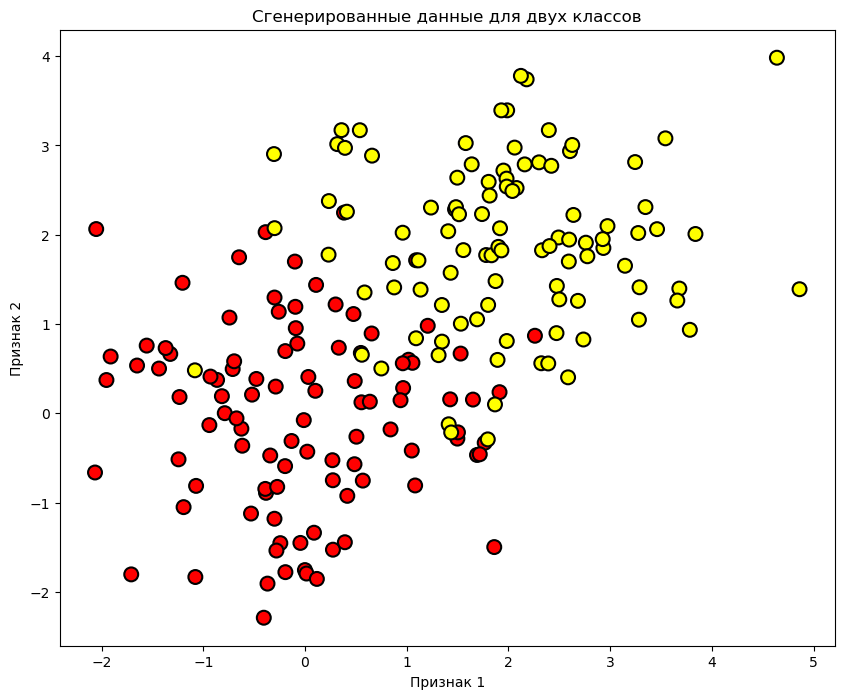

In [15]:

import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(7)

# Первый класс данных
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# Второй класс данных
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

# Визуализация данных
plt.figure(figsize=(10, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap="autumn", edgecolors="black", linewidth=1.5)
plt.title("Сгенерированные данные для двух классов")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()


## Обучение дерева решений и визуализация разделяющей поверхности

Теперь обучим модель дерева решений на сгенерированных данных и визуализируем разделяющую поверхность, построенную моделью. Мы будем использовать функцию `get_grid` для построения сетки координат, чтобы отобразить предсказания модели в виде цветной области.

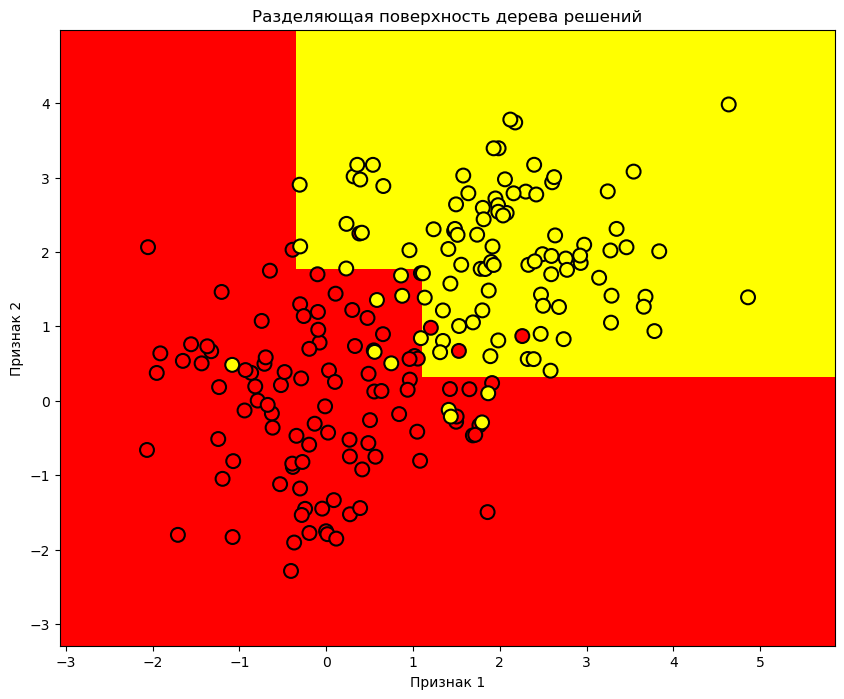

In [17]:

# Функция для создания сетки координат
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps), np.arange(y_min, y_max, eps))

# Обучение модели дерева решений
clf_tree = DecisionTreeClassifier(max_depth=3, criterion='gini')
clf_tree.fit(train_data, train_labels)

# Построение сетки и визуализация разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, predicted, cmap="autumn", shading='auto')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap="autumn", edgecolors="black", linewidth=1.5)
plt.title("Разделяющая поверхность дерева решений")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()


## Визуализация структуры дерева решений

Используем библиотеку `pydotplus` для визуализации структуры обученного дерева решений. Сначала экспортируем дерево в формат `.dot`, затем преобразуем его в изображение и отображаем в ноутбуке.

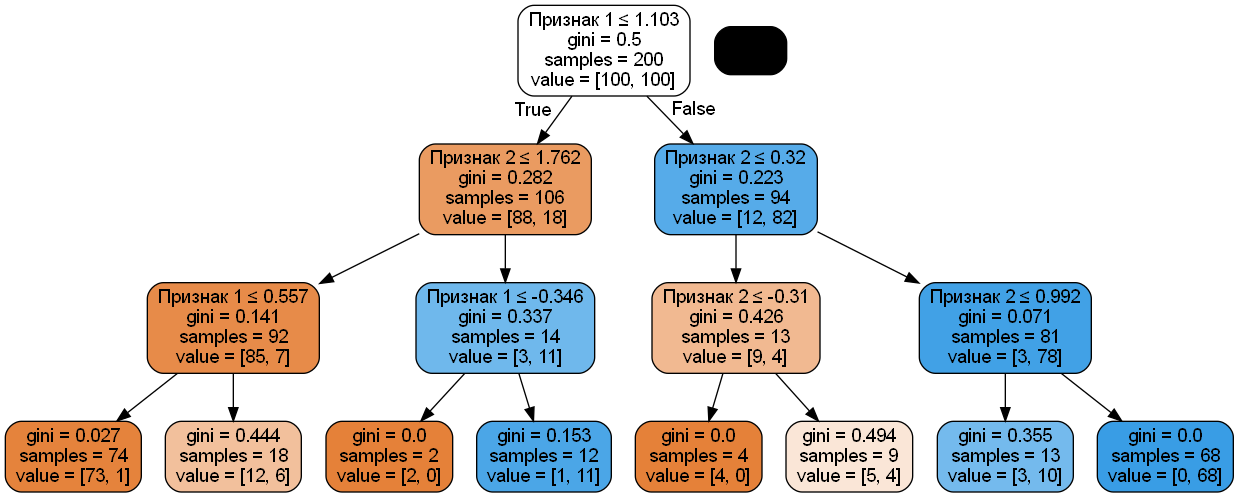

In [19]:

from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Экспорт дерева решений в формат .dot и создание графа
dot_data = StringIO()
export_graphviz(clf_tree, feature_names=["Признак 1", "Признак 2"], out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Отображение графа дерева решений
Image(graph.create_png())


## 2. Ансамблевые методы

Ансамблевые методы объединяют несколько моделей деревьев решений для повышения точности и устойчивости. В Scikit-Learn доступны несколько ансамблевых методов, таких как случайный лес, градиентный бустинг и адаптивный бустинг.

### Случайный лес (Random Forest)

Случайный лес — ансамбль из нескольких случайных деревьев решений, обученных на различных подвыборках данных. Результат предсказания основывается на голосовании (для классификации) или усреднении (для регрессии) предсказаний всех деревьев.

In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Создание и обучение модели случайного леса
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Предсказание и оценка
y_pred_rf = rf.predict(X_test)
print("Точность модели случайного леса:", accuracy_score(y_test, y_pred_rf))


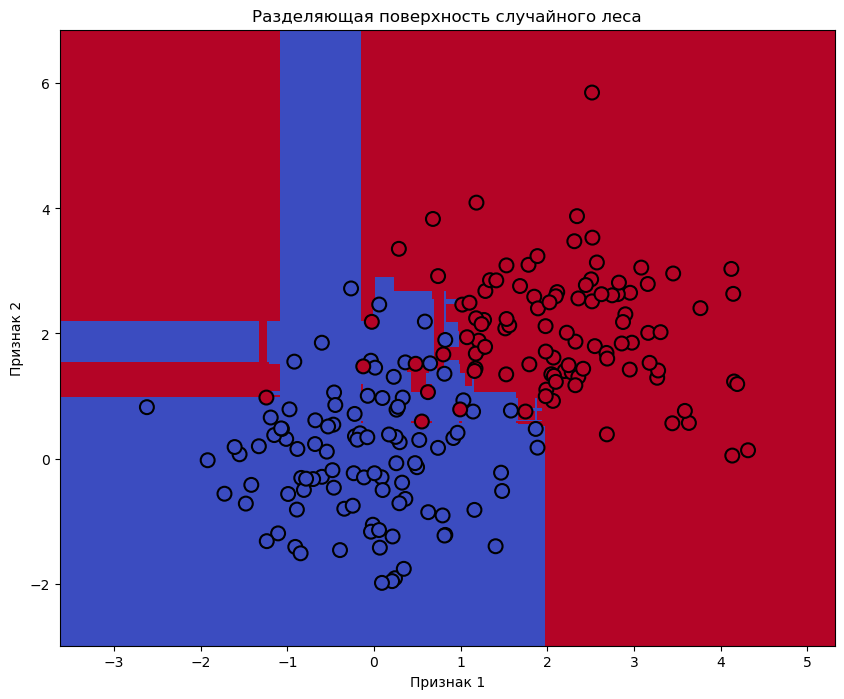

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Генерация данных для случайного леса
np.random.seed(42)
rf_data = np.random.normal(size=(100, 2))
rf_labels = np.zeros(100)

# Добавляем второй класс
rf_data = np.r_[rf_data, np.random.normal(size=(100, 2), loc=2)]
rf_labels = np.r_[rf_labels, np.ones(100)]

# Обучение модели случайного леса
rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf.fit(rf_data, rf_labels)

# Построение сетки и визуализация разделяющей поверхности
xx, yy = get_grid(rf_data)
predicted_rf = rf_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, predicted_rf, cmap="coolwarm", shading='auto')
plt.scatter(rf_data[:, 0], rf_data[:, 1], c=rf_labels, s=100, cmap="coolwarm", edgecolors="black", linewidth=1.5)
plt.title("Разделяющая поверхность случайного леса")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

### Градиентный бустинг (Gradient Boosting)

Градиентный бустинг создаёт последовательность деревьев, где каждое следующее дерево корректирует ошибки предыдущих. Это мощный метод, который требует больше времени на обучение, но часто показывает лучшую точность.

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

# Создание и обучение модели градиентного бустинга
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)

# Предсказание и оценка
y_pred_gb = gb.predict(X_test)
print("Точность модели градиентного бустинга:", accuracy_score(y_test, y_pred_gb))


### Адаптивный бустинг (AdaBoost)

Адаптивный бустинг обучает последовательность деревьев решений, где каждая следующая модель уделяет больше внимания ошибочно классифицированным примерам, чтобы улучшить точность.

In [ ]:

from sklearn.ensemble import AdaBoostClassifier

# Создание и обучение модели адаптивного бустинга
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(X_train, y_train)

# Предсказание и оценка
y_pred_ada = ada.predict(X_test)
print("Точность модели адаптивного бустинга:", accuracy_score(y_test, y_pred_ada))


## Заключение

Деревья решений и ансамблевые методы представляют собой мощные инструменты для задач классификации и регрессии. Они легко интерпретируются и могут быть эффективно применены для решения многих задач. Ансамблевые методы, такие как случайный лес и бустинг, помогают повысить точность и устойчивость моделей, объединяя несколько деревьев решений в единый ансамбль.

## 3. Метод ближайших соседей (K-Nearest Neighbors)

Метод ближайших соседей (KNN) — это простой и популярный алгоритм машинного обучения для задач классификации и регрессии. Он основан на идее, что объекты, находящиеся ближе друг к другу, имеют схожие характеристики.

Для классификации объекту присваивается класс, наиболее часто встречающийся среди его ближайших соседей, а для регрессии — усреднённое значение ближайших соседей.

### Пример использования `KNeighborsClassifier`

`KNeighborsClassifier` — это модель ближайших соседей, которая используется для классификации на основе расстояний до ближайших соседей.

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Создание и обучение модели ближайших соседей
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Предсказание и оценка
y_pred_knn = knn.predict(X_test)
print("Отчет классификации для K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))


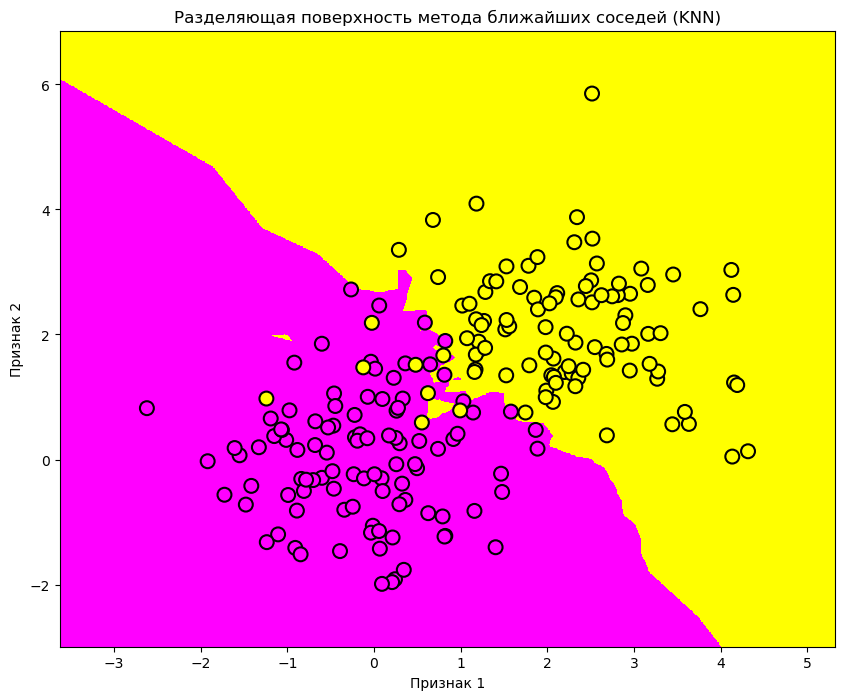

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Генерация данных для метода ближайших соседей
np.random.seed(42)
knn_data = np.random.normal(size=(100, 2))
knn_labels = np.zeros(100)

# Добавляем второй класс
knn_data = np.r_[knn_data, np.random.normal(size=(100, 2), loc=2)]
knn_labels = np.r_[knn_labels, np.ones(100)]

# Обучение модели K-Nearest Neighbors
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(knn_data, knn_labels)

# Построение сетки и визуализация разделяющей поверхности
xx, yy = get_grid(knn_data)
predicted_knn = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, predicted_knn, cmap="spring", shading='auto')
plt.scatter(knn_data[:, 0], knn_data[:, 1], c=knn_labels, s=100, cmap="spring", edgecolors="black", linewidth=1.5)
plt.title("Разделяющая поверхность метода ближайших соседей (KNN)")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()
